<img src="../src/CY-Cergy-Paris-172_coul.png">

# Diplôme universitaire Data Analyst (DUDA)

## Techniques de visualisation de données

Mai 2023

### Analyse d’un jeu de données réel

In [1]:
# Bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import plotly.graph_objects as go
import plotly.io as pio


In [2]:
df_PhD = pd.read_csv("PhD_v3.csv", encoding='utf-8', sep = ',',
                       low_memory=False,
                       parse_dates=["Publication dans theses.fr",
                                    "Mise a jour dans theses.fr",
                                    "Date de premiere inscription en doctorat",
                                    "Date de soutenance"])
#df_PhD.head()

In [3]:
print("Info")
print(df_PhD.info())
print("--" * 18)
print("Describe")
print(df_PhD.describe())
print("--" * 18)
print("Shape")
print(df_PhD.shape)


Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 448047 entries, 0 to 448046
Data columns (total 23 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Unnamed: 0                                448047 non-null  int64         
 1   Auteur                                    448047 non-null  object        
 2   Identifiant auteur                        317700 non-null  object        
 3   Titre                                     448040 non-null  object        
 4   Directeur de these                        448034 non-null  object        
 5   Directeur de these (nom prenom)           448034 non-null  object        
 6   Identifiant directeur                     448047 non-null  object        
 7   Etablissement de soutenance               448046 non-null  object        
 8   Identifiant etablissement                 430965 non-null  object        
 9   Discipline

In [4]:
# Nous allons corriger le nom de certaines colonnes et leur contenu
df_PhD = df_PhD.rename(columns={'Discipline_prÃ©di': 'Discipline_predi'})
assert 'Discipline_predi' in df_PhD.columns, "Error"


In [5]:
df_PhD['Discipline_predi'] = df_PhD['Discipline_predi'].replace(
    {'MathÃ©matiques': 'Matematiques',
     "Science de l'ingÃ©nieur": "Sciences de l'ingenieur",
     'Science de la Terre':'Sciences de la Terre', 
     'Economie Gestion':'Economie et Gestion'})


In [6]:
# Convertir "Discipline_predi" de String en catégorie
df_PhD['Discipline_predi'] = df_PhD['Discipline_predi'].astype('category')
df_PhD["Year"] = df_PhD["Year"].astype('Int64')

#df_PhD.info()

In [7]:
# Nous allons utiliser ces informations pour créer les deux premiers graphiques
df_PhD['Discipline_predi'].value_counts(ascending = True)


Poubelle                            451
Mathematiques et Informatique       887
Sciences de l'education            1074
Sciences de la Terre              15448
Informatique                      17058
Psychologie                       17264
Matematiques                      20048
Economie et Gestion               21785
Langues et Litteratures           27376
Droit et Science Politique        30849
Medecine                          31305
Sciences de l'ingenieur           34438
SHS                               57338
Materiaux, Milieux et Chimie      72519
Biologie                         100207
Name: Discipline_predi, dtype: int64

In [8]:
# Qu'y a-t-il à l'intérieur de Poubelle ?
print(df_PhD[df_PhD['Discipline_predi'] == 'Poubelle'].head())


     Unnamed: 0               Auteur Identifiant auteur  \
367         367  Abderrazzak Boukraa                NaN   
369         369       Omar Ben ounis                NaN   
372         372    Mickael Blanchard                NaN   
376         376    Matthieu Casteran                NaN   
551         551        Marion Brunet                NaN   

                                                 Titre  \
367  Influence de l'approche interculturelle sur la...   
369  Modifications endocriniennes et metaboliques d...   
372  Fatigue et perception de l'effort en course d'...   
376  Vieillissement, controle modulaire de l'equili...   
551  L'optimisation des compromis gestuels : propos...   

                       Directeur de these  \
367                        Charles Roncin   
369                       Paul Delamarche   
372        Olivier Buttelli,Benoit Grison   
376  Patrick Manckoundia,Elizabeth Thomas   
551                         Jacques Larue   

          Directeur de th

## Exercice 1

<p>Nous vous demandons de représenter l’évolution quantitative des différentes disciplines
sur la période 1985-2018, via deux types de graphiques. Le premier est
le ”stacked area plot”, le second est le stacked bar chart. Tous ces graphiques
seront stockés uniquement dans le notebook Jupyter, et seuls quelques-uns
seront mobilisés dans un court rapport de quelques pages dans lequel nous allons
nous entraîner à décrire des figures.</p>

In [9]:
df_annees = df_PhD[['Date de soutenance', 'Discipline_predi']].copy()

df_annees['Date de soutenance'] = pd.to_datetime(df_annees['Date de soutenance'],
                                                 format='%d-%m-%y')

df_annees['Annee'] = df_annees['Date de soutenance'].dt.year

df_discipline = pd.DataFrame(df_annees[(df_annees['Annee'] >= 1985) &
                                       (df_annees['Annee'] <= 2018)]
                           .groupby(
                               ['Annee', 'Discipline_predi'])['Date de soutenance']
                             .count())

df_discipline.reset_index(inplace=True)

df_discipline['Annee'] = df_discipline['Annee'].astype(int)

# Nous n'allons pas prendre en compte la discipline "Poubelle".
df_discipline = df_discipline[df_discipline['Discipline_predi'] != 'Poubelle']
df_discipline.columns = ['Annee', 'Discipline_predi', 'Count']

df_discipline.head()

Annee            Discipline_predi  Count
0   1985                    Biologie    695
1   1985  Droit et Science Politique    168
2   1985         Economie et Gestion    220
3   1985                Informatique     45
4   1985     Langues et Litteratures    268

### Stacked Area Plot

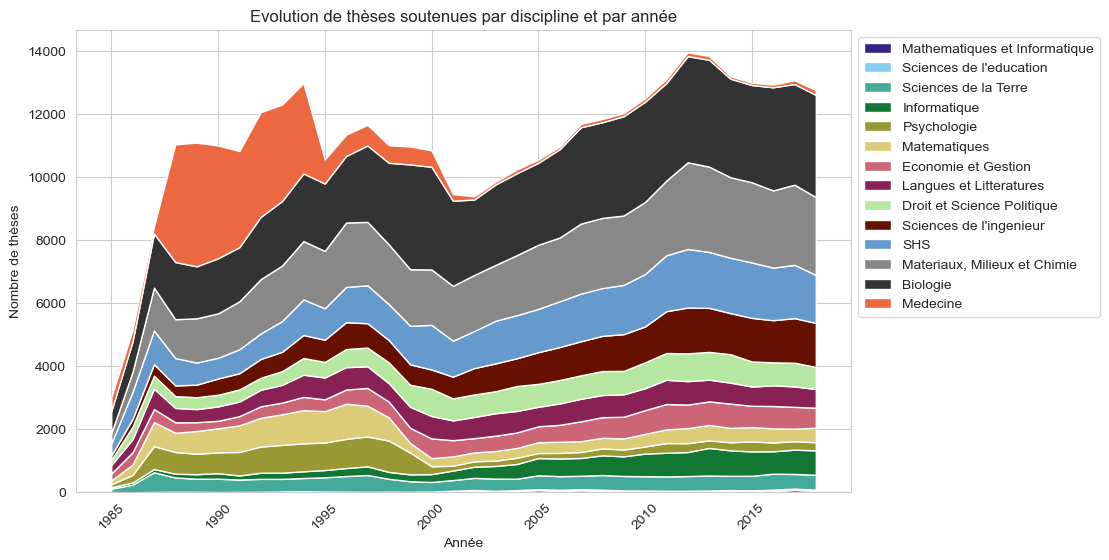

In [10]:
#Nous ordonnons les disciplines selon la colonne "Compte" par ordre croissant.
disciplines_sorted = ['Mathematiques et Informatique', "Sciences de l'education",
                      'Sciences de la Terre', 'Informatique', 'Psychologie',
                      'Matematiques', 'Economie et Gestion',
                      'Langues et Litteratures', 'Droit et Science Politique',
                      "Sciences de l'ingenieur", 'SHS',
                      'Materiaux, Milieux et Chimie', 'Biologie', 'Medecine']

df_discipline['Discipline_predi_ordered'] = pd.Categorical(
                                                df_discipline['Discipline_predi'],
                                                categories=disciplines_sorted)

df_discipline = df_discipline.sort_values(by=['Annee', 'Discipline_predi_ordered',
                                        'Count'], ascending=[True, True, False])

dfPivotDiscipline = df_discipline.pivot(index='Annee',
                                        columns='Discipline_predi_ordered',
                                        values='Count').fillna(0)

blind_palette = ['#332288', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77',
                 '#CC6677', '#882255', '#b5e7a0', '#661100', '#6699CC', '#888888',
                 '#333333', '#EB6841']

sns.set_palette(blind_palette)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
plt.stackplot(dfPivotDiscipline.index, dfPivotDiscipline.values.T,
              labels=dfPivotDiscipline.columns)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel('Nombre de thèses')
years = np.arange(
    dfPivotDiscipline.index.min(), dfPivotDiscipline.index.max() + 1, 5)
plt.xticks(years, rotation=45)
plt.xlabel('Année')
plt.title('Evolution de thèses soutenues par discipline et par année')
plt.savefig('grafico-area.png', dpi=300, bbox_inches='tight')
plt.show()


### Stacked Bar Chart

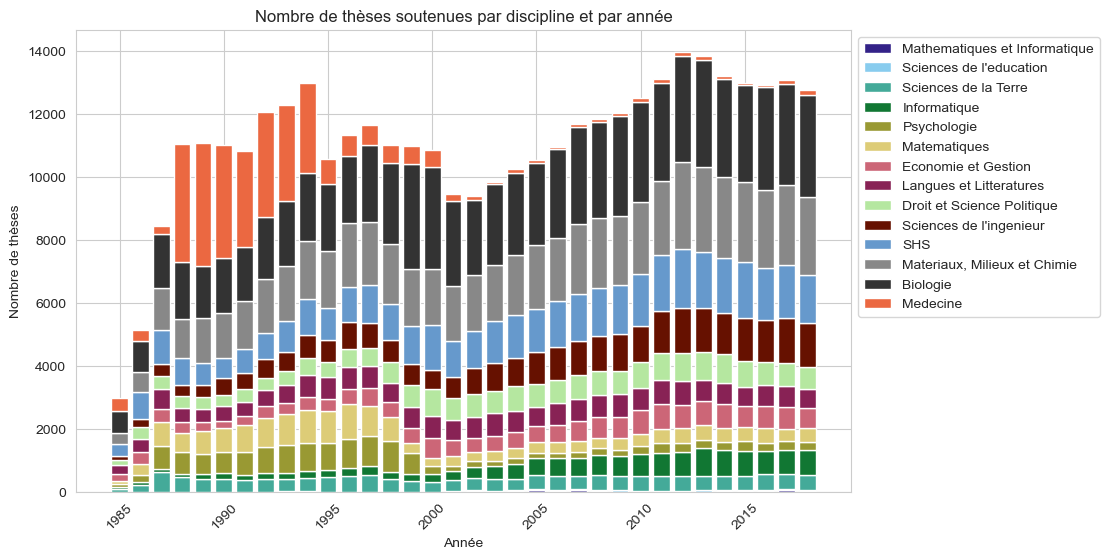

In [11]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

plt.bar(dfPivotDiscipline.index, dfPivotDiscipline.values.T[0],
        color=blind_palette[0], label=dfPivotDiscipline.columns[0])

for i in range(1, len(dfPivotDiscipline.columns)):
    plt.bar(dfPivotDiscipline.index,
            dfPivotDiscipline.values.T[i],color=blind_palette[i],
            bottom=dfPivotDiscipline.values.T[:i].sum(axis=0),
            label=dfPivotDiscipline.columns[i])

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ylabel('Nombre de thèses')
years = np.arange(
    dfPivotDiscipline.index.min(), dfPivotDiscipline.index.max() + 1, 5)
plt.xticks(years, rotation=45)
plt.xlabel('Année')
plt.title('Nombre de thèses soutenues par discipline et par année')
plt.savefig('grafico-barras.png', dpi=300, bbox_inches='tight')
plt.show()


### Exercice 2

<p> Pour commencer, produisez un graphe comprenant une grille en fond (en anglais, background grid). Vous devez maintenant produire un nouveau graphique, légèrement transparent, de sorte que la grille apparaisse derrière le graphe .Réalisez plusieurs niveaux de transparence. Nous vous donnons un mot-clé seulement : alpha.</p>

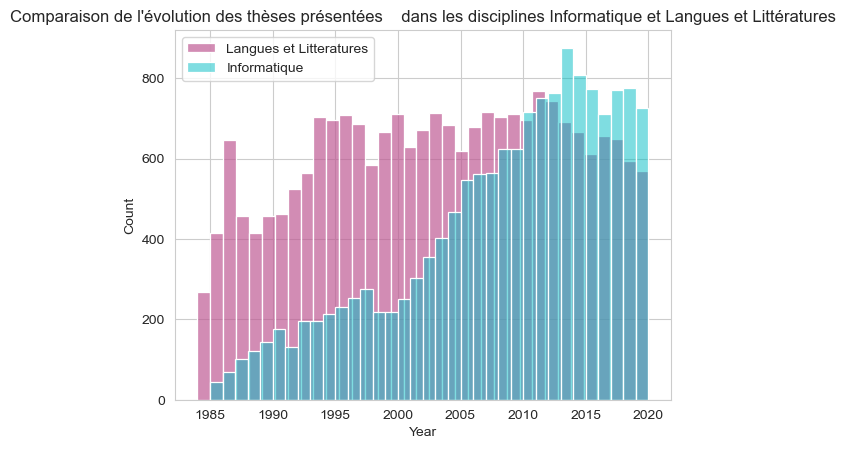

In [12]:
# Dans les graphiques suivants, le même graphique est utilisé,
#en variant les niveaux de transparence.
sns.set_style("whitegrid")
sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Langues et Litteratures']
             ["Year"], bins=35, color='#BF5B94', alpha=0.7)
sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Informatique']
             ["Year"], bins=35, color='#00BDC4', alpha=0.5)
plt.legend(["Langues et Litteratures","Informatique"])
plt.title(
    "Comparaison de l'évolution des thèses présentées\
    dans les disciplines Informatique et Langues et Littératures")
plt.savefig('grafico-barras1.png', dpi=300, bbox_inches='tight')
plt.show()


### Exercice 3

<p> Dans l’exercice 3, nous repartons sur des graphes non transparents, mais avec toujours une grille. Nous allons jouer sur la distance entre l’axe et les labels correspondants. </p>

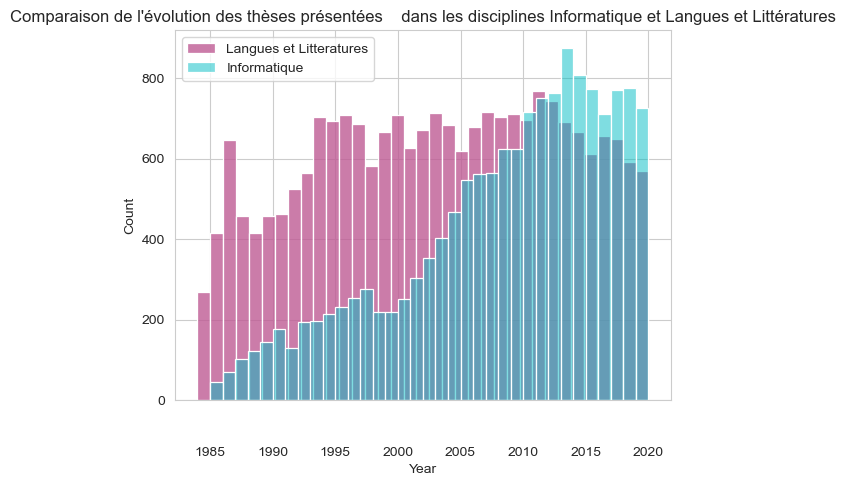

In [13]:
sns.set_style("whitegrid")
sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Langues et Litteratures']
             ["Year"], bins=35, color='#BF5B94', alpha=0.8)
sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Informatique']
             ["Year"], bins=35, color='#00BDC4', alpha=0.5)
plt.tick_params(axis='x', pad=30)
plt.legend(["Langues et Litteratures","Informatique"])
plt.title(
    "Comparaison de l'évolution des thèses présentées\
    dans les disciplines Informatique et Langues et Littératures")
plt.savefig('grafico-barras2.png', dpi=300, bbox_inches='tight')
plt.show()


<p>Dans un second temps, produisez un graphique où ces labels sont légèrement inclinés de 45°.  </p>

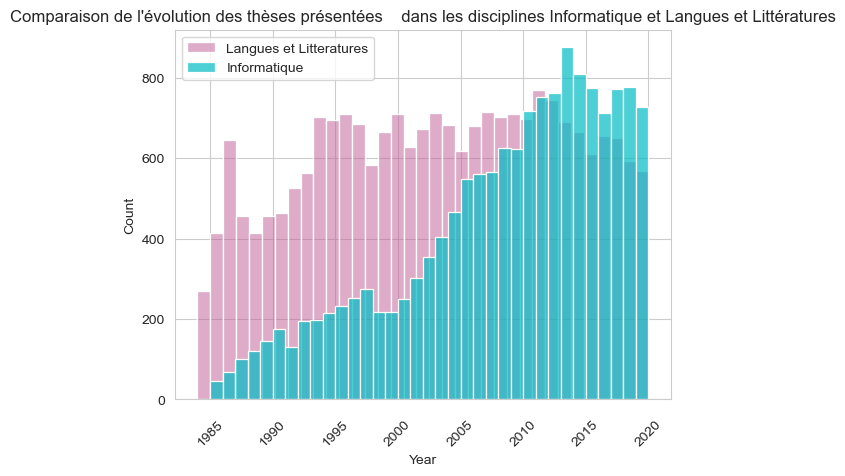

In [14]:
sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Langues et Litteratures']
             ["Year"], bins=35, color='#BF5B94', alpha=0.5)
sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Informatique']
             ["Year"], bins=35, color='#00BDC4', alpha=0.7)
plt.tick_params(axis='x', pad=10, rotation = 45)
plt.legend(["Langues et Litteratures","Informatique"])
plt.title(
    "Comparaison de l'évolution des thèses présentées\
    dans les disciplines Informatique et Langues et Littératures")
plt.savefig('grafico-barras3.png', dpi=300, bbox_inches='tight')
plt.show()


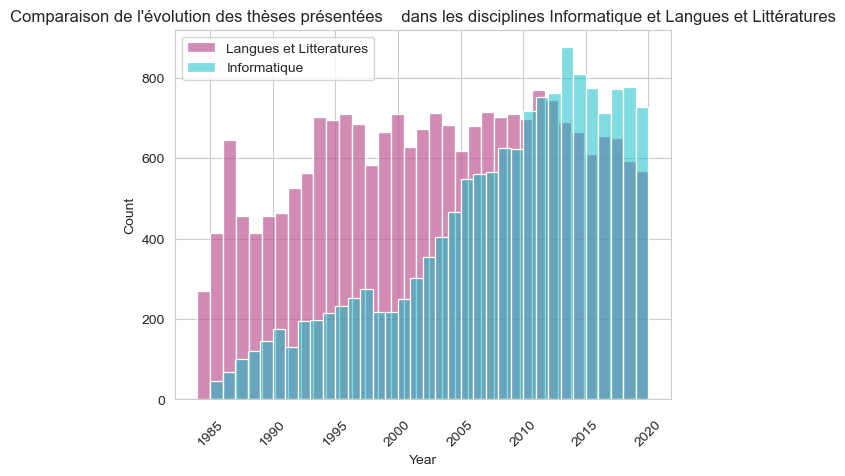

In [15]:
sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Langues et Litteratures']
             ["Year"], bins=35, color='#BF5B94', alpha=0.7)
sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Informatique']
             ["Year"], bins=35, color='#00BDC4', alpha=0.5)
plt.tick_params(axis='x', pad=10, rotation = 45)
plt.legend(["Langues et Litteratures","Informatique"])
plt.title(
    "Comparaison de l'évolution des thèses présentées\
    dans les disciplines Informatique et Langues et Littératures")
plt.savefig('grafico-barras4.png', dpi=300, bbox_inches='tight')
plt.show()


### Exercice 4

<p>Dans l’exercice 4, nous vous demandons de reproduire le même graphique, mais en changeant la police pour utiliser du Times New Roman ou du Garamond. Produisez ensuite différents graphiques pour montrer
que vous êtes capables de jouer sur la taille de la police pour les labels des axes et pour le titre.</p>

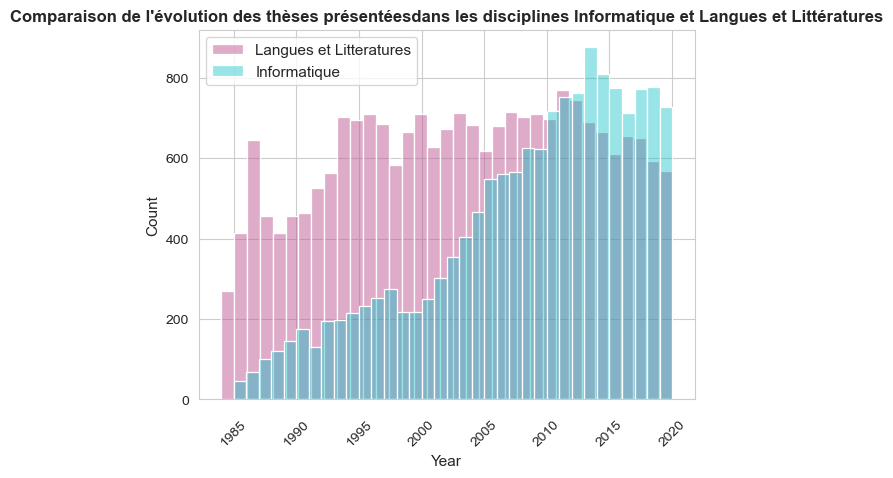

In [16]:
# Dans les graphiques suivants, différents formats 
#(type, taille, style) sont utilisés pour la police.

sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Langues et Litteratures']
             ["Year"], bins=35, color='#BF5B94', alpha=0.5)
sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Informatique']
             ["Year"], bins=35, color='#00BDC4', alpha=0.4)
plt.tick_params(axis='x', pad=10, rotation = 45)
font = {'family': 'Arial', 'size': 11}
plt.title("Comparaison de l'évolution des thèses présentées\
dans les disciplines Informatique et Langues et Littératures",
          fontweight='bold', fontname="Arial", fontsize=12)
plt.legend(["Langues et Litteratures","Informatique"], prop=font)
plt.xticks(fontname='Arial', fontsize=10)
plt.yticks(fontname='Arial', fontsize=10)
plt.xlabel("Year", fontname="Arial", fontsize=11)
plt.ylabel("Count", fontname="Arial", fontsize=11)
plt.savefig('grafico-barras5.png', dpi=300, bbox_inches='tight')
plt.show()


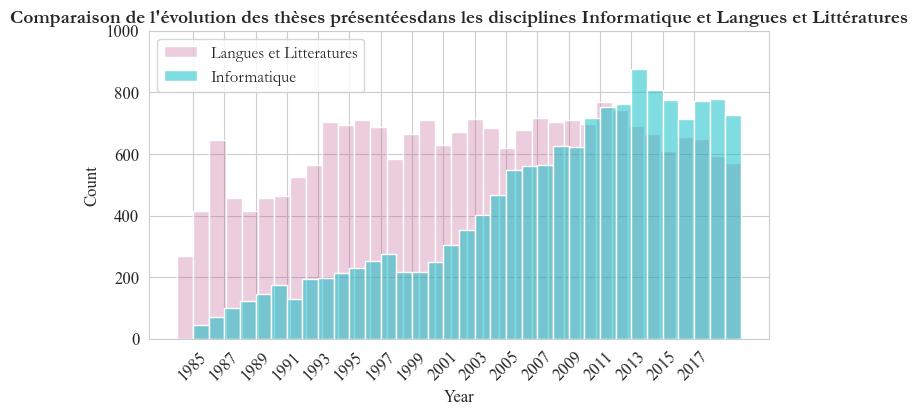

In [17]:
plt.figure(figsize=(8, 4))
sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Langues et Litteratures']
             ["Year"], bins=35, color='#BF5B94', alpha=0.3)
sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Informatique']
             ["Year"], bins=35, color='#00BDC4', alpha=0.5)
plt.tick_params(axis='x', rotation = 45)
font = {'family': 'Garamond', 'size': 12}
plt.title("Comparaison de l'évolution des thèses présentées\
dans les disciplines Informatique et Langues et Littératures",
          fontweight='bold', fontname="Garamond", fontsize=14)
plt.ylim(0, 1000)
plt.legend(["Langues et Litteratures","Informatique"], prop=font)
plt.xticks(np.arange(1985, 2019, step=2))
plt.xticks(fontname='Times New Roman', fontsize=12)
plt.yticks(fontname='Times New Roman', fontsize=12)
plt.xlabel("Year", fontname="Times New Roman", fontsize=12)
plt.ylabel("Count", fontname="Times New Roman", fontsize=12)
plt.savefig('grafico-barras6.png', dpi=300, bbox_inches='tight')
plt.show()


<p> Produisez un second graphique sur lequel vous jouez sur la taille des marges, pour ”écraser” un peu le graphique vers le centre.</p>

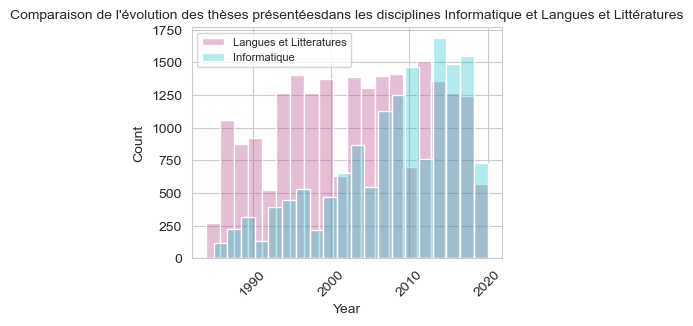

In [18]:
plt.figure(figsize=(4, 3))
sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Langues et Litteratures']
             ["Year"], bins=20, color='#BF5B94', alpha=0.4)
sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Informatique']
             ["Year"], bins=20, color='#00BDC4', alpha=0.3)
plt.tick_params(axis='x', rotation = 45)
font = {'family': 'Arial', 'size': 8}
plt.title("Comparaison de l'évolution des thèses présentées\
dans les disciplines Informatique et Langues et Littératures",
          fontname="Arial", fontsize=10)
plt.legend(["Langues et Litteratures","Informatique"], prop=font)
plt.xticks(fontname='Arial', fontsize=10)
plt.yticks(fontname='Arial', fontsize=10)
plt.xlabel("Year", fontname="Arial", fontsize=10)
plt.ylabel("Count", fontname="Arial", fontsize=10)
plt.savefig('grafico-barras7.png', dpi=300, bbox_inches='tight')
plt.show()

### Exercice 5

<p> Dans l’exercice 5, nous vous demandons de produire un graphe où vous changez l’échelle des Y par une échelle logarithmique. </p>

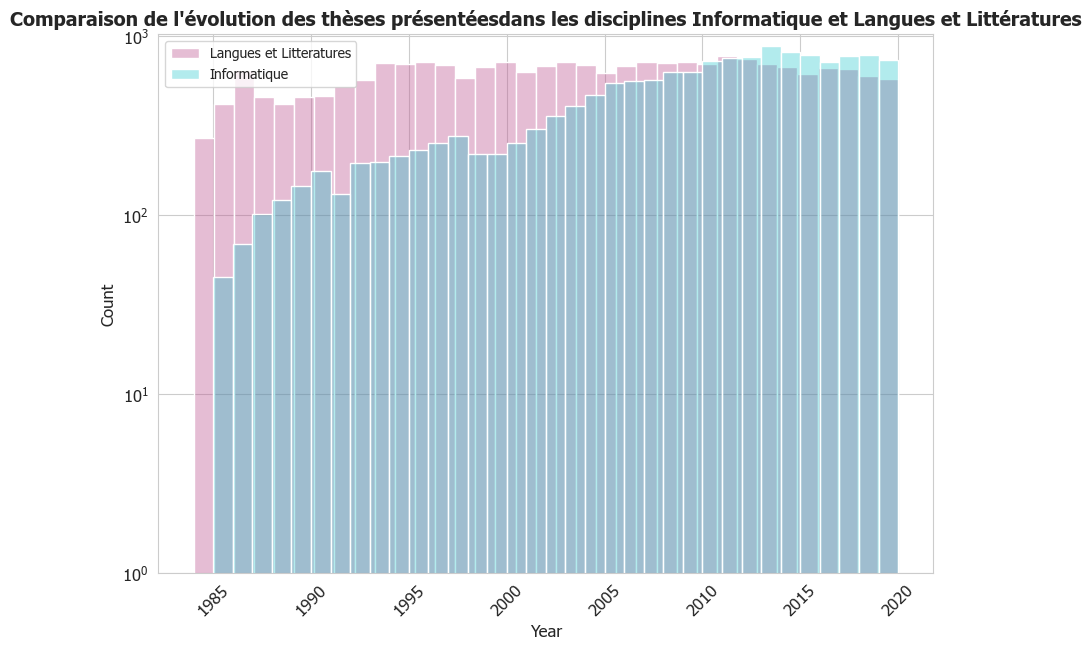

In [19]:
plt.figure(figsize=(10, 7))
sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Langues et Litteratures']
             ["Year"], bins=35, color='#BF5B94', alpha=0.4)
sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Informatique']
             ["Year"], bins=35, color='#00BDC4', alpha=0.3)
plt.tick_params(axis='x', rotation = 45)
font = {'family': 'Tahoma', 'size': 10}
plt.title("Comparaison de l'évolution des thèses présentées\
dans les disciplines Informatique et Langues et Littératures",
          fontweight='bold', fontname="Tahoma", fontsize=14)
plt.legend(["Langues et Litteratures","Informatique"], prop=font)
plt.xticks(fontname='Tahoma', fontsize=12)
plt.yticks(fontname='Tahoma', fontsize=12)
plt.xlabel("Year", fontname="Tahoma", fontsize=12)
plt.ylabel("Count", fontname="Tahoma", fontsize=12)
plt.yscale('log')
plt.ylim(bottom=1)
plt.savefig('grafico-barras8.png', dpi=300, bbox_inches='tight')
plt.show()


### Exercice 6

<p> Dans l’exercice 6, nous vous demandons de jouer sur la position de la légende (reprenant les différentes disciplines). Produisez des graphiques avec deux positions différentes de la légende.</p>

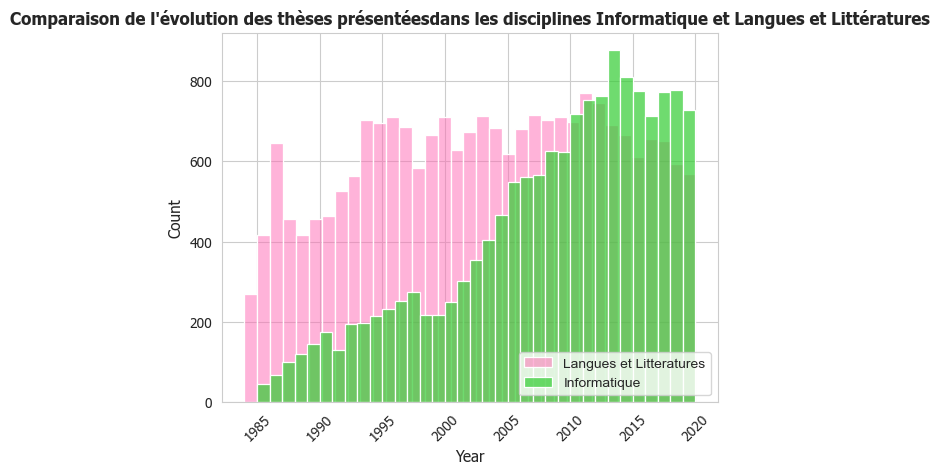

In [20]:
categories = ['Langues et Litteratures', 'Informatique']

sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Langues et Litteratures']
             ["Year"], bins=35, color='#FF69B4', alpha=0.5)
sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Informatique']
             ["Year"], bins=35, color='#32CD32', alpha=0.7)

plt.tick_params(axis='x', rotation = 45)

font = {'family': 'Tahoma', 'size': 12}

plt.title("Comparaison de l'évolution des thèses présentées\
dans les disciplines Informatique et Langues et Littératures",
          fontweight='bold', fontname="Tahoma", fontsize=12)
plt.legend(["Langues et Litteratures","Informatique"], prop=font)
plt.legend(categories, loc='lower right')
plt.xticks(fontname='Tahoma', fontsize=10)
plt.yticks(fontname='Tahoma', fontsize=10)
plt.xlabel("Year", fontname="Tahoma", fontsize=11)
plt.ylabel("Count", fontname="Tahoma", fontsize=11)
plt.savefig('grafico-barras9.png', dpi=300, bbox_inches='tight')
plt.show()


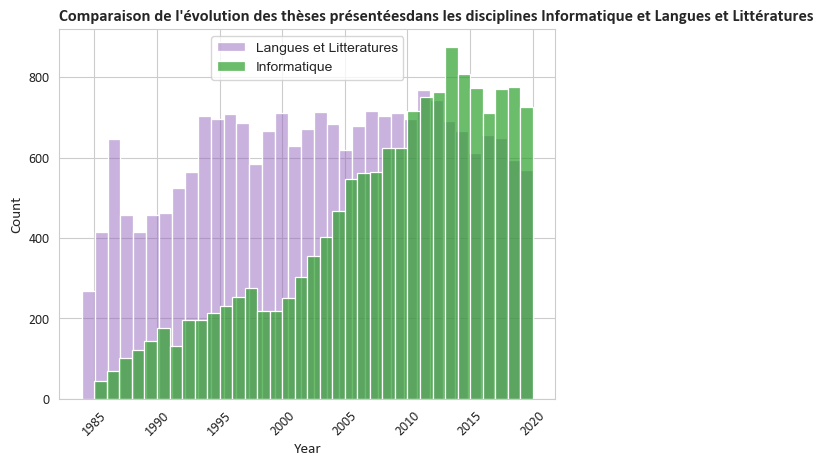

In [21]:
sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Langues et Litteratures']
             ["Year"], bins=35, color='#9467BD', alpha=0.5)
sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Informatique']
             ["Year"], bins=35, color='#2CA02C', alpha=0.7)

plt.tick_params(axis='x', rotation = 45)

font = {'family': 'Calibri', 'size': 12}

plt.title("Comparaison de l'évolution des thèses présentées\
dans les disciplines Informatique et Langues et Littératures",
          fontweight='bold', fontname="Calibri", fontsize=12, loc='left')
plt.legend(["Langues et Litteratures","Informatique"], prop=font)
plt.legend(categories, loc='upper center')
plt.xticks(fontname='Calibri', fontsize=10)
plt.yticks(fontname='Calibri', fontsize=10)
plt.xlabel("Year", fontname="Calibri", fontsize=11)
plt.ylabel("Count", fontname="Calibri", fontsize=11)
plt.savefig('grafico-barras10.png', dpi=300, bbox_inches='tight')
plt.show()


### Exercice 7

<p> Dans l’exercice 7, changez la palette de couleur utilisée pour représenter les différentes disciplines.</p>

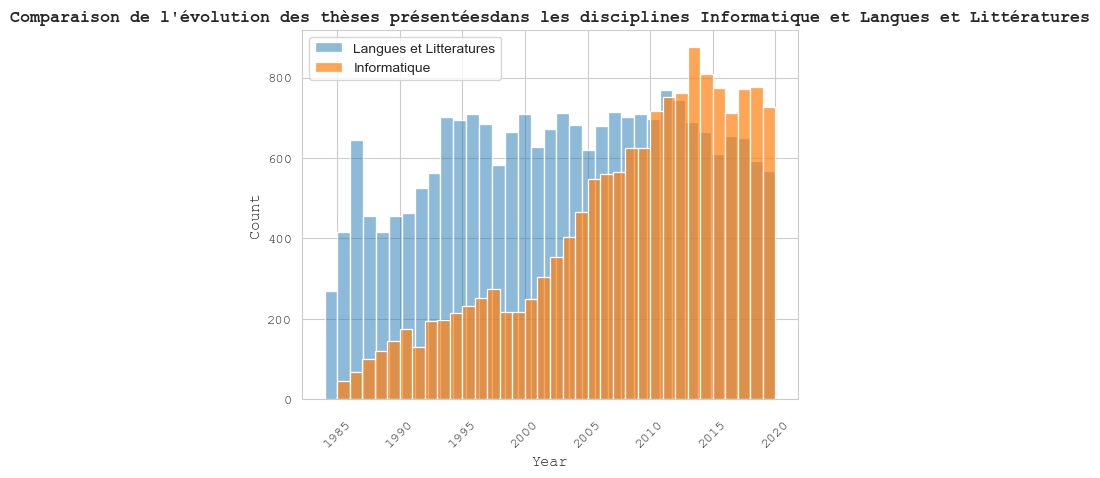

In [22]:
sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Langues et Litteratures']
             ["Year"], bins=35, color='#1f77b4', alpha=0.5)
sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Informatique']
             ["Year"], bins=35, color='#ff7f0e', alpha=0.7)

plt.tick_params(axis='x', pad=10, rotation = 45)

font = {'family': 'Courier New', 'size': 12}

plt.title("Comparaison de l'évolution des thèses présentées\
dans les disciplines Informatique et Langues et Littératures",
          fontweight='bold', fontname="Courier New", fontsize=12)
plt.legend(["Langues et Litteratures","Informatique"], prop=font)
plt.legend(categories, loc='upper left')
plt.xticks(fontname='Courier New', fontsize=10)
plt.yticks(fontname='Courier New', fontsize=10)
plt.xlabel("Year", fontname="Courier New", fontsize=11)
plt.ylabel("Count", fontname="Courier New", fontsize=11)
plt.savefig('grafico-barras11.png', dpi=300, bbox_inches='tight')
plt.show()


### Exercice 8

<p> Dans l’exercice 8, changez l’ordre (de bas en haut) dans lequel apparaissent les disciplines. Par exemple, si la biologie est en bas, touchant l’axe des X, elle doit apparaître en haut.</p>

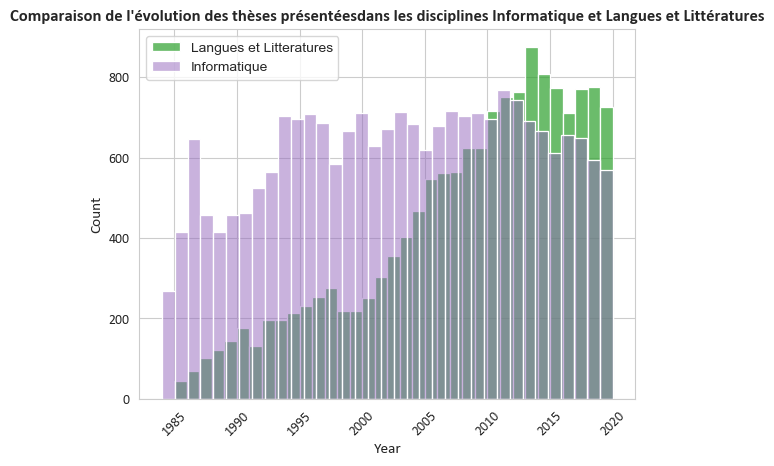

In [23]:
sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Informatique']
             ["Year"], bins=35, color='#2CA02C', alpha=0.7)

sns.histplot(df_PhD[df_PhD["Discipline_predi"]=='Langues et Litteratures']
             ["Year"], bins=35, color='#9467BD', alpha=0.5)

plt.tick_params(axis='x', rotation = 45)

font = {'family': 'Calibri', 'size': 11}

plt.title("Comparaison de l'évolution des thèses présentées\
dans les disciplines Informatique et Langues et Littératures",
          fontweight='bold', fontname="Calibri", fontsize=12, loc='center')
plt.legend(["Langues et Litteratures","Informatique"], prop=font)
plt.legend(categories, loc='best')
plt.xticks(fontname='Calibri', fontsize=10)
plt.yticks(fontname='Calibri', fontsize=10)
plt.xlabel("Year", fontname="Calibri", fontsize=11)
plt.ylabel("Count", fontname="Calibri", fontsize=11)
plt.savefig('grafico-barras12.png', dpi=300, bbox_inches='tight')
plt.show()


### Exercice 9 : Graphiques interactifs

<p> Dans cet exercice, nous vous laissons toute latitude pour choisir ce que vous souhaitez représenter à partir du jeu de données sur les thèses. Nous vous donnons une seule contrainte : incorporez comme dans la figure ci-dessous un ”slider” (barre horizontale sur laquelle vous pouvez faire varier le temps, entre autres). Vous devrez utiliser plotly, que ce soit sur R ou sur Python. Il n’y a pas obligation à produire un bubble plot, qui ne sert ici que d’illustration pour le slider. Vous devrez ensuite produire un second graphique, mais utilisant cette
fois un ”selector”. </p>

In [24]:
df_discipline.head()


Annee               Discipline_predi  Count       Discipline_predi_ordered
7    1985  Mathematiques et Informatique      2  Mathematiques et Informatique
12   1985        Sciences de l'education      5        Sciences de l'education
14   1985           Sciences de la Terre    109           Sciences de la Terre
3    1985                   Informatique     45                   Informatique
10   1985                    Psychologie     94                    Psychologie

In [25]:
# Nous revenons à la liste que nous avons créée précédemment
disciplines_sorted = ['Mathematiques et Informatique', "Sciences de l'education",
                      'Sciences de la Terre', 'Informatique', 'Psychologie',
                      'Matematiques', 'Economie et Gestion',
                      'Langues et Litteratures', 'Droit et Science Politique',
                      "Sciences de l'ingenieur", 'SHS', 
                      'Materiaux, Milieux et Chimie', 'Biologie', 'Medecine']

disciplines_sorted.sort()
dfDisciplines = df_discipline.drop('Discipline_predi_ordered', axis=1)
dfDisciplines.rename(columns={'Discipline_predi': 'Discipline'}, inplace=True)


### Graphique interactif comportant un slider
**Le graphique se trouve dans le dossier "src"**

In [26]:
fig = go.Figure()
steps = []

custom_colors = ['#0000FF']
counter = 0  

for year in dfDisciplines['Annee'].unique():
    visible_data = dfDisciplines[dfDisciplines['Annee'] == year]  
    bars = []  
    
    for discipline in disciplines_sorted:
        discipline_data = visible_data[visible_data['Discipline'] == discipline]
        bar = go.Bar(
            x=[discipline],
            y=[discipline_data['Count'].values[0]],  
            marker=dict(color=custom_colors[counter % len(custom_colors)])  
        )
        bars.append(bar)
    
    fig.add_traces(bars)

    step = dict(
        method="update",
        args=[{"visible": [year == i for i in dfDisciplines['Annee']]}],
        label=str(year)
    )
    steps.append(step)
    counter += 1 

fig.update_layout(
    barmode='group',  
    sliders=[{"active": 0,
              "currentvalue": {"prefix": "Année: "},
              "pad": {"t": 110},
              "steps": steps}],
    xaxis=dict(
        tickangle=-45  
    ),
    yaxis=dict(
        title="Count",  
        range=[0, 4100]
    ),
    title="Évolution des thèses soutenues par discipline et par année",  
    showlegend=False
)

fig.show()
pio.write_html(fig, "grafico2.html")
# Le graphique se trouve dans le dossier "src"

### Graphique interactif comportant un "selector”
**Le graphique se trouve dans le dossier "src"**

In [27]:
fig = go.Figure()
disciplinas = ["Droit et Science Politique", 'Informatique', 
               'Matematiques', 'Psychologie']

custom_colors = ['#00FF00', '#FF0000', '#0000FF', '#CC79A7']

dropdown_buttons = [
    {'label': 'Toutes', 'method': 'update',
     'args': [{'visible': [True, True, True, True]},
              {'title': 'Toutes'}]},
    {'label': "Droit et Science Politique", 'method': 'update',
     'args': [{'visible': [True, False, False, False]},
              {'title': "Droit et Science Politique"}]},
    {'label': 'Informatique', 'method': 'update',
     'args': [{'visible': [False, True, False, False]},
              {'title': 'Informatique'}]},
    {'label': 'Matematiques', 'method': 'update',
     'args': [{'visible': [False, False, True, False]},
              {'title': 'Matematiques'}]},
    {'label': "Psychologie", 'method': "update",
     'args': [{"visible": [False, False, False, True]},
              {'title': 'Psychologie'}]}
]

for i, discipline in enumerate(disciplinas):
    df = dfDisciplines[dfDisciplines['Discipline'] == discipline]
    fig.add_trace(go.Bar(x=df['Annee'], y=df['Count'], name=discipline,
                         marker=dict(color=custom_colors[i])))

fig.update_layout(
    updatemenus=[
        {
            "type": "dropdown",
            "x": 1.3,
            "y": 0.5,
            "showactive": True,
            "active": 0,
            "buttons": dropdown_buttons
        }
    ],
    xaxis=dict(
        title="Discipline",  
        tickangle=-45  
    ),
    yaxis=dict(
        title="Count",  
        range=[0, 1200]
    ),
    title="Evolution des thèses soutenues dans certaines disciplines par an"  
)

fig.show()
pio.write_html(fig, "grafico1.html")
# Le graphique se trouve dans le dossier "src"